In [4]:
import sys
sys.path.insert(1,"src")
import nupack as n
import time
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.compat.v2 as tf




tfk = tf.keras
tfkl = tf.keras.layers



tf.enable_v2_behavior()
tfk = tf.keras
tfkl = tf.keras.layers


import GA_util
import util
print(tf.__version__)

2.13.0


In [5]:
tmp = np.load('data/toehold_data/collins_encoded.npy')
print(GA_util.unencode(tmp[0,:,:]))

CAAAAAAAAATTACTACTATTGTTAATTTAGAACAGAGGAGACTAAATATGCAATAGTAG


In [28]:
#Writing NUPACK code to generate toehold switches
prevented_sequences = ['A6','U6','C6','G6','S12','W12','K12','M12','R12','Y12']
# prevented_sequences = ['A6','U6','C6','G6']

pattern  = [n.Pattern(prevented_sequences)]



a = n.Domain('N12',name='a')
b_1 = n.Domain('N9',name='b_1')
b_2 = n.Domain('N3',name='b_2')
b_3 = n.Domain('N6',name='b_3')
RBS = n.Domain('AACAGAGGAGA',name='RBS')
# RBS= n.Domain('aacagaggaga',name='RBS')
AUG = n.Domain('AUG',name='start')
# AUG = n.Domain('aug',name='start')

trigger_strand = n.TargetStrand([~b_3,~b_2,~b_1,~a],name='trigger_strand')
toehold_strand = n.TargetStrand([a,b_1,b_2,b_3,RBS,~b_3,AUG,~b_1],name='switch_strand')

trigger_structure = 'U30'
switch_structure = 'U12 D9 (U3 D6 (U11) U3)'

switch_trigger_structure = 'D30 (U29 +)'





print(toehold_strand.nt())
trigger_complex = n.TargetComplex([trigger_strand],trigger_structure,name='trigger_complex')
toehold_complex = n.TargetComplex([toehold_strand],switch_structure,name='toehold_complex')    
switch_trigger_complex = n.TargetComplex([toehold_strand,trigger_strand],switch_trigger_structure,name='switch_trigger_complex')



t1 = n.TargetTube(on_targets={toehold_complex:1e-8}, name='tube1')
        
my_model = n.Model()
my_tubes = [t1]
design = n.tube_design(tubes = my_tubes, hard_constraints=[], soft_constraints=[], defect_weights = None, model = my_model)

59


In [29]:
values = [1,10,100,1000,5000]

nupack_save = []


for value in values:
    print(value)
    time_start = time.time()
    result = design.run(value)
    nupack_save.append(time.time()-time_start)



1
10
100
1000
5000


In [30]:
generator = tfk.models.load_model('models/toehold_generator_2023-04-21')
# generator = tfk.models.load_model('models/toehold_generator_2024-02-08')

print(generator.inputs)
gan_save = []

for value in values:
    time_start = time.time()
    rands = np.random.uniform(size=(value,128))
    constructs = generator(rands)
    gan_save.append(time.time()-time_start)

[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'input_5')>]


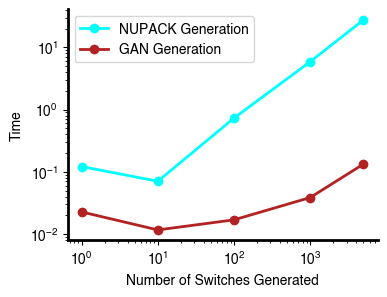

In [31]:
plt.figure(figsize=(4,3))
plt.rcParams.update({'font.size': 10,'font.family':'Helvetica'})

# plt.title('Toehold Generation Time')
plt.plot(values,nupack_save,color='cyan',label='NUPACK Generation',linewidth=2,marker='o')
plt.plot(values,gan_save,color='firebrick',label='GAN Generation',linewidth=2,marker='o')
plt.ylabel('Time')
plt.xlabel('Number of Switches Generated')
plt.yscale('log')
plt.xscale('log')
plt.subplot().spines['right'].set_visible(False)
plt.subplot().spines['top'].set_visible(False)
plt.subplot().spines['left'].set_linewidth(2.0)
plt.subplot().spines['bottom'].set_linewidth(2.0)
plt.legend()
# plt.savefig('figures/toehold_generation_time.svg',bbox_inches='tight',pad_inches=1,transparent=True)
# plt.savefig('figures/toehold_structure_probability.png',dpi=500,bbox_inches='tight',pad_inches=1,transparent=True)


In [78]:
# seq_lst = []

# for i in range(len(nupack_seqs)):
#     seq_lst.append(str(nupack_seqs[i].to_analysis['switch_strand']).replace('U','T'))
# import pandas as pd
# seq_lst = pd.DataFrame({'Sequence':seq_lst})
# seq_lst

# encoded = util.one_hot_encode(seq_lst)

# util.plot_logo(encoded,title='NUPACK Designed Sequences')


# np.save('data/nupack_generated_sequences.npy',encoded)

,Sequence
0,GAAAAATAAAAAGGTAAGTGAGTCGAAGGCAACAGAGGAGAGCCTT...
1,GTAGTAGGGGGAGGTAGTATGAAGCGGTGGAACAGAGGAGACCACC...
2,AAGGGGGTAGTGGGTTTTTGAGTCTGGATGAACAGAGGAGACATCC...
3,CCCCTTCTCCTACTCACTTTCACCCTTACCAACAGAGGAGAGGTAA...
4,AGATATGGATGGGTGGGAAAGAGGCTGGACAACAGAGGAGAGTCCA...
...,...
995,GAGTAAGATGGAGGGAGTTTAAAAGGTTGCAACAGAGGAGAGCAAC...
996,TATCTATTTTTCCCTTATTATGCCGTTGTCAACAGAGGAGAGACAA...
997,TAGTAAGGTGGAGGGAGTTGTAAAGATGGGAACAGAGGAGACCCAT...
998,AAAAAGAAAGATGAAGAAATGAAATGGAACAACAGAGGAGAGTTCC...


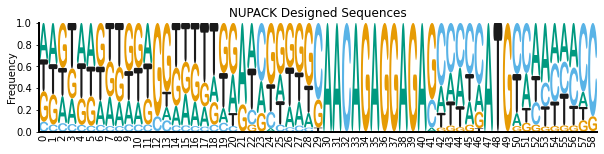